# In this Jupyter notebook I will compare the genes responsible for formation of multicellular phenotypes between cerevisiae, pombe and albicans. Analysis done with data accessed on 10th of March 2025.



Source:

http://www.candidagenome.org/download/homology/orthologs/

https://www.pombase.org/data/orthologs/

http://current.geneontology.org/products/pages/downloads.html

In [1]:
#import data science packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats



root = "/Users/k23030440/github_projects/S.-Pombe-MLPs/"
map = pd.read_csv(root + "external data/Pombase files/gene_IDs_names_products.tsv", sep="\t", header=None)
plt.rcParams["font.family"] = "Arial"


In [2]:
albicans_GO = pd.read_csv(root + 'external data/Orthologs data/albicans_GO_new.gaf.gz', sep='\t', header=49)
#columns should be named as DB, DB Object, DB Object Symbol, Qualifier, GO ID, DB:Reference (|DB:Reference), Evidence Code, With (or) From, Aspect, DB Object Name, DB Object Synonym (|Synonym), DB Object Type, Taxon(|taxon), 	Date, Assigned By,  Annotation Extension, Gene product form ID
albicans_GO.columns = ['DB', 'DB Object', 'DB Object Symbol', 'Qualifier', 'GO ID', 'DB:Reference', 'Evidence Code', 'With (or) From', 'Aspect', 'DB Object Name', 'DB Object Synonym', 'DB Object Type', 'Taxon', 'Date', 'Assigned By', 'Annotation Extension', 'Gene product form ID']

/var/folders/g6/4flmdffs7l35hmmt1wkgrfcm0000gr/T/ipykernel_96629/3507866535.py:1: DtypeWarning: Columns (9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  albicans_GO = pd.read_csv(root + 'external data/Orthologs data/albicans_GO_new.gaf.gz', sep='\t', header=49)


In [3]:
#repeat for cerevisiae
cerevisiae_GO = pd.read_csv(root + 'external data/Orthologs data/cerevisiae_GO_new.gaf.gz', sep='\t', header=35)
cerevisiae_GO.columns = ['DB', 'DB Object', 'DB Object Symbol', 'Qualifier', 'GO ID', 'DB:Reference', 'Evidence Code', 'With (or) From', 'Aspect', 'DB Object Name', 'DB Object Synonym', 'DB Object Type', 'Taxon', 'Date', 'Assigned By', 'Annotation Extension', 'Gene product form ID']


In [4]:
#repeat for pombe
pombe_GO = pd.read_csv(root + 'external data/Orthologs data/pombe_GO_new.gaf.gz', sep='\t', header=35)
pombe_GO.columns = ['DB', 'DB Object', 'DB Object Symbol', 'Qualifier', 'GO ID', 'DB:Reference', 'Evidence Code', 'With (or) From', 'Aspect', 'DB Object Name', 'DB Object Synonym', 'DB Object Type', 'Taxon', 'Date', 'Assigned By', 'Annotation Extension', 'Gene product form ID']

In [5]:
albicans_cerevisiae = pd.read_table(root + 'external data/Orthologs data/albicans-cerevisiae.txt', sep='\t', header=8)
#move column names to first row
albicans_cerevisiae.iloc[0] = albicans_cerevisiae.columns
#change first albicans name entry to NaN
albicans_cerevisiae.iloc[0,1] = np.nan
#rename columns to albicans systematic, albicans  gene name, albicans database ID, cerevisiae systematic, cerevisiae gene name, cerevisiae single_entry_database ID
albicans_cerevisiae.columns = ['albicans systematic', 'albicans  gene name', 'albicans database ID', 'cerevisiae systematic', 'cerevisiae gene name', 'cerevisiae database ID']

In [6]:
albicans_pombe = pd.read_table(root + 'external data/Orthologs data/albicans-pombe.txt', sep='\t', header=8)
#move column names to first row
albicans_pombe.iloc[0] = albicans_pombe.columns
#change first albicans name entry to NaN
albicans_pombe.iloc[0,1] = np.nan
#rename columns to albicans systematic, albicans  gene name, albicans database ID, pombe systematic, pombe gene name, pombe database ID
albicans_pombe.columns = ['albicans systematic', 'albicans  gene name', 'albicans database ID', 'pombe systematic', 'pombe gene name', 'pombe database ID']
albicans_pombe

,albicans systematic,albicans gene name,albicans database ID,pombe systematic,pombe gene name,pombe database ID
0,CR_07050C_A,NaN,CAL0000196578,SPAC22G7.06c,SPAC22G7.06c.1,SPAC22G7.06c.2
1,CR_00640W_A,ACC1,CAL0000198598,SPAC56E4.04c,SPAC56E4.04c,SPAC56E4.04c
2,C4_00970C_A,MDN1,CAL0000174407,SPCC737.08,SPCC737.08,SPCC737.08
3,C2_07330W_A,TOR1,CAL0000187577,SPBC216.07c,SPBC216.07c,SPBC216.07c
4,C6_01320W_A,TRA1,CAL0000175793,SPBP16F5.03c,SPBP16F5.03c,SPBP16F5.03c
...,...,...,...,...,...,...
2598,C4_06840W_A,NaN,CAL0000196332,SPCC736.09c,SPCC736.09c,SPCC736.09c
2599,C1_09480W_A,PPT2,CAL0000183849,SPAC3G9.17,SPAC3G9.17,SPAC3G9.17
2600,C5_02110W_A,NaN,CAL0000180850,SPAP8A3.04c,SPAP8A3.04c,SPAP8A3.04c
2601,C5_02080C_A,HSP12,CAL0000182697,SPAP8A3.04c,SPAP8A3.04c,SPAP8A3.04c


In [7]:
pombe_cerevisiae = pd.read_table(root + 'external data/Orthologs data/pombe-cerevisiae.tsv', sep='\t', header=0)
#rename columns to pombe systematic and cerevisiae systematic
pombe_cerevisiae.columns = ['pombe systematic', 'cerevisiae systematic']


In [8]:
#get genes of interest from cerevisae
go_terms_cerevisae = {
    
 "GO:0000128" : "flocculation",
 "GO:0098609": "cell-cell adhesion",
 "GO:0007155": "cell adhesion",
 "GO:0000128": "flocculation",
"GO:0007155": "cell adhesion",
"GO:0060256": "regulation of flocculation",
"GO:0001403":"invasive growth in response to glucose limitation",
"GO:2000218":"negative regulation of invasive growth in response to glucose limitation",
"GO:2000219": "positive regulation of invasive growth in response to glucose limitation",
"GO:0030447":"filamentous growth",
"GO:0060257":"negative regulation of flocculation",
"GO:1900735":"positive regulation of flocculation",
"GO:0060256":"regulation of flocculation",
"GO:0062040": "fungal biofilm matrix",
"GO:0042710": "biofilm formation",
"GO:0043709": "cell adhesion involved in single-species biofilm formation",
"GO:0043710": "cell adhesion involved in multi-species biofilm formation",
"GO:1900189":"positive regulation of cell adhesion involved in single-species biofilm formation",
"GO:1900231":"regulation of single-species biofilm formation on inanimate substrate",
"GO:0044011":"single-species biofilm formation on inanimate substrate",
"GO:0090606":"single-species surface biofilm formation",
"GO:0050839": "cell adhesion molecule binding",
"GO:0007155": "cell adhesion",
"GO:0098609": "cell-cell adhesion",
"GO:0007160":"cell-matrix adhesion",
"GO:0010811": "positive regulation of cell-substrate adhesion"}
#get genes from cerevisiae_GO that have GO ID in go_terms_cerevisae.keys()
cerevisiae_genes = cerevisiae_GO[cerevisiae_GO['GO ID'].isin(go_terms_cerevisae.keys())]
#get systematic names from the DB Object Synonym column before the |
cerevisiae_genes= np.array(cerevisiae_genes['DB Object Synonym'].str.split('|').str[0])
#remove repeats
cerevisiae_genes = np.unique(cerevisiae_genes)
#change dtype to string
cerevisiae_genes = cerevisiae_genes.astype(str)
#manual curation
#add YER027C, YDR477W, YGL115W
cerevisiae_genes = np.append(cerevisiae_genes, ['YER027C', 'YDR477W', 'YGL115W'])
#in cerevisiae_genes numpy array remove entries that do not start with Y
cerevisiae_genes = cerevisiae_genes[np.char.startswith(cerevisiae_genes, 'Y')]

cerevisiae_genes

array(['YAL056W', 'YAL063C', 'YAR050W', 'YBL016W', 'YBR066C', 'YBR083W',
       'YBR095C', 'YBR171W', 'YBR289W', 'YCL047C', 'YCR089W', 'YDL024C',
       'YDL035C', 'YDL159W', 'YDL160C', 'YDL230W', 'YDR043C', 'YDR103W',
       'YDR107C', 'YDR363W-A', 'YDR392W', 'YDR477W', 'YDR480W', 'YEL071W',
       'YER020W', 'YER027C', 'YER109C', 'YER113C', 'YER124C', 'YER149C',
       'YFL014W', 'YGL032C', 'YGL121C', 'YGL208W', 'YGR040W', 'YGR044C',
       'YGR270W', 'YHL007C', 'YHR030C', 'YHR073W', 'YHR084W', 'YHR111W',
       'YHR211W', 'YHR213W', 'YIL008W', 'YIL034C', 'YIL084C', 'YIR019C',
       'YJL089W', 'YJR004C', 'YKL092C', 'YKR102W', 'YLR083C', 'YLR229C',
       'YLR362W', 'YMR164C', 'YMR263W', 'YMR307W', 'YMR316W', 'YNL079C',
       'YNL097C', 'YNL119W', 'YNL197C', 'YNL294C', 'YNR044W', 'YOL051W',
       'YOL116W', 'YOL151W', 'YOR080W', 'YOR094W', 'YOR127W', 'YOR140W',
       'YOR212W', 'YOR275C', 'YOR276W', 'YOR290C', 'YOR315W', 'YOR371C',
       'YPL049C', 'YPL089C', 'YPL203W', 'YSC0042'

In [9]:
go_terms_cerevisae_to_csv = pd.DataFrame.from_dict(go_terms_cerevisae, orient='index')
go_terms_cerevisae_to_csv.to_csv(root + 'external data/Orthologs data/go_terms.csv')

In [10]:
go_terms_albicans = {
 "GO:0000128" : "flocculation",
 "GO:0098609": "cell-cell adhesion",
 "GO:0007155": "cell adhesion",
 "GO:0000128": "flocculation",
"GO:0007155": "cell adhesion",
"GO:0060256":" regulation of flocculation",
"GO:0001403":"invasive growth in response to glucose limitation",
"GO:2000218":"negative regulation of invasive growth in response to glucose limitation",
"GO:2000219": "positive regulation of invasive growth in response to glucose limitation",
"GO:0030447":"filamentous growth",
"GO:0000128":"flocculation",
"GO:0060257":"negative regulation of flocculation",
"GO:1900735":"positive regulation of flocculation",
"GO:0060256":"regulation of flocculation",
"GO:0062040": "fungal biofilm matrix",
"GO:0042710": "biofilm formation",
"GO:0043709": "cell adhesion involved in single-species biofilm formation",
"GO:0043710": "cell adhesion involved in multi-species biofilm formation",
"GO:1900189":"positive regulation of cell adhesion involved in single-species biofilm formation",
"GO:1900231":"regulation of single-species biofilm formation on inanimate substrate",
"GO:0044011":"single-species biofilm formation on inanimate substrate",
"GO:0090606":"single-species surface biofilm formation",
"GO:0050839": "cell adhesion molecule binding",
"GO:0007155": "cell adhesion",
"GO:0098609": "cell-cell adhesion",
"GO:0007160":"cell-matrix adhesion",
"GO:0010811": "positive regulation of cell-substrate adhesion"
}

#get genes from albicans_GO that have GO ID in go_terms_albicans.keys()
albicans_genes = albicans_GO[albicans_GO['GO ID'].isin(go_terms_albicans.keys())]
#allow database only CGD
#albicans_genes = albicans_genes[albicans_genes['DB'].isin(['CGD'])]
#get systematic names from the DB Object Synonym column before the |
albicans_genes= np.array(albicans_genes['DB Object Synonym'].str.split('|').str[0])
#remove nans
albicans_genes = albicans_genes[~pd.isnull(albicans_genes)]
#remove repeats
albicans_genes = np.unique(albicans_genes)
#keep each gene if it starts with C1, C2, C3, C4, C5, C6 or C7
albicans_genes = np.array([x for x in albicans_genes if x.startswith(('C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7'))])
#manual curation if needed
albicans_genes

array(['C1_00060W_A', 'C1_00080C_A', 'C1_00110W_A', 'C1_00140W_A',
       'C1_00150C_A', 'C1_00160C_A', 'C1_00180W_A', 'C1_00220W_A',
       'C1_00490C_A', 'C1_00610W_A', 'C1_00620W_A', 'C1_00650C_A',
       'C1_00670C_A', 'C1_00730C_A', 'C1_00780C_A', 'C1_00900W_A',
       'C1_00930C_A', 'C1_00950C_A', 'C1_00960C_A', 'C1_01070C_A',
       'C1_01170C_A', 'C1_01270W_A', 'C1_01760W_A', 'C1_01980W_A',
       'C1_02120C_A', 'C1_02150W_A', 'C1_02260C_A', 'C1_02480W_A',
       'C1_02590C_A', 'C1_02840W_A', 'C1_02860C_A', 'C1_02920W_A',
       'C1_02990C_A', 'C1_03110W_A', 'C1_03190C_A', 'C1_03220C_A',
       'C1_03380W_A', 'C1_03500W_A', 'C1_03510C_A', 'C1_03710C_A',
       'C1_03730C_A', 'C1_03740W_A', 'C1_03770W_A', 'C1_03860C_A',
       'C1_03980W_A', 'C1_04020C_A', 'C1_04140W_A', 'C1_04300C_A',
       'C1_04380W_A', 'C1_04410C_A', 'C1_04520C_A', 'C1_04540C_A',
       'C1_04770C_A', 'C1_05070C_A', 'C1_05090W_A', 'C1_05140W_A',
       'C1_05760C_A', 'C1_05850W_A', 'C1_06010W_A', 'C1_06020W

In [11]:
go_terms_pombe = {
 "GO:0000128" : "flocculation",
 "GO:0098609": "cell-cell adhesion",
 "GO:0007155": "cell adhesion",
 "GO:0000128": "flocculation",
"GO:0007155": "cell adhesion",
"GO:0060256":"regulation of flocculation",
"GO:0001403":"invasive growth in response to glucose limitation",
"GO:2000218":"negative regulation of invasive growth in response to glucose limitation",
"GO:2000219": "positive regulation of invasive growth in response to glucose limitation",
"GO:0030447":"filamentous growth",
"GO:0000128":"flocculation",
"GO:0060257":"negative regulation of flocculation",
"GO:1900735":"positive regulation of flocculation",
"GO:0060256":"regulation of flocculation",
"GO:0062040": "fungal biofilm matrix",
"GO:0042710": "biofilm formation",
"GO:0043709": "cell adhesion involved in single-species biofilm formation",
"GO:0043710": "cell adhesion involved in multi-species biofilm formation",
"GO:1900189":"positive regulation of cell adhesion involved in single-species biofilm formation",
"GO:1900231":"regulation of single-species biofilm formation on inanimate substrate",
"GO:0044011":"single-species biofilm formation on inanimate substrate",
"GO:0090606":"single-species surface biofilm formation",
"GO:0050839": "cell adhesion molecule binding",
"GO:0007155": "cell adhesion",
"GO:0098609": "cell-cell adhesion",
"GO:0007160":"cell-matrix adhesion",
"GO:0010811": "positive regulation of cell-substrate adhesion"
}
#get genes from pombe_GO that have GO ID in go_terms_pombe.keys()
pombe_genes = pombe_GO[pombe_GO['GO ID'].isin(go_terms_pombe.keys())]
#get systematic names from the DB Object Synonym column before the |
pombe_genes= np.array(pombe_genes['DB Object'])

#remove nans
pombe_genes = pombe_genes[~pd.isnull(pombe_genes)]

pombe_genes = pombe_genes.astype(str)
pombe_genes = np.unique(pombe_genes)
pombe_genes


array(['SPAC186.01', 'SPAC1F8.06', 'SPAC977.07c', 'SPAP11E10.02c',
       'SPAPB15E9.01c', 'SPAPB2C8.01', 'SPBC1289.15', 'SPBC1348.08c',
       'SPBC15D4.02', 'SPBC19C7.02', 'SPBC1D7.02c', 'SPBC21D10.06c',
       'SPBC317.01', 'SPBC31F10.10c', 'SPBC359.04c', 'SPBC646.13',
       'SPBC947.04', 'SPBPJ4664.02', 'SPCC1223.13', 'SPCC188.09c',
       'SPCC1919.03c'], dtype='<U13')

In [101]:
#code:
# get a list of genes that are relevant in each species
# #for each gene check if its in the other two species
#create a df with columns: albicans_name(s), cerevisiae_name(s), albicans_name(s), albicans, cerevisiae, pombe
def make_dbase(albicans_genes, cerevisiae_genes, pombe_genes):
    database = pd.DataFrame(columns=['albicans_name(s)', 'cerevisiae_name(s)', 'pombe_name(s)', 'albicans', 'cerevisiae', 'pombe'])
    # check for each gene in cerevisiae genes if it has an ortholog
    #suppress warnings
    import warnings
    warnings.filterwarnings("ignore")
    for gene in cerevisiae_genes:
        orthologs_albicans = np.array([])
        orthologs_pombe = np.array([])
        #get orthologs from cerevisiae
        orthologs_albicans=np.append(orthologs_albicans,albicans_cerevisiae[albicans_cerevisiae['cerevisiae systematic'] == gene]['albicans systematic'].values)
        orthologs_pombe = np.append(orthologs_pombe,pombe_cerevisiae[pombe_cerevisiae['cerevisiae systematic'] == gene]['pombe systematic'].values)
        #if length of albicans orthologs is more than 0, then check if the albicans orthologs have a pombe ortholog
        if len(orthologs_albicans) > 0:
            #loop thorugh albicans orthologs and see if they have a pombe ortholog in the albicans_pombe df
            for ortholog in orthologs_albicans:
                #get pombe orthologs from albicans
                orthologs_pombe = np.append(orthologs_pombe,albicans_pombe[albicans_pombe['albicans systematic'] == ortholog]['pombe systematic'].values)
            #same the other way around
        if len(orthologs_pombe) > 0:
            for ortholog in orthologs_pombe:
                orthologs_albicans = np.append(orthologs_albicans,albicans_pombe[albicans_pombe['pombe systematic'] == ortholog]['albicans systematic'].values)

            #remove repeats
        orthologs_albicans = np.unique(orthologs_albicans)
        orthologs_pombe = np.unique(orthologs_pombe)
            #add to database
            #if there are pombe and albicans orthologs set their binary to 1
        pombe_binary=0
        albicans_binary=0
        if len(orthologs_pombe) > 0:
            pombe_binary=1
        if len(orthologs_albicans) > 0:
            albicans_binary=1

        new_row = pd.DataFrame([{'albicans_name(s)': orthologs_albicans, 
                         'cerevisiae_name(s)': gene, 
                         'pombe_name(s)': orthologs_pombe, 
                         'albicans': albicans_binary, 
                         'cerevisiae': 1, 
                         'pombe': pombe_binary}])

        database = pd.concat([database, new_row], ignore_index=True)


    for gene in albicans_genes:
        orthologs_cerevisiae = np.array([])
        orthologs_pombe = np.array([])
        #get orthologs from cerevisiae
        orthologs_cerevisiae=np.append(orthologs_cerevisiae,albicans_cerevisiae[albicans_cerevisiae['albicans systematic'] == gene]['cerevisiae systematic'].values)
        orthologs_pombe = np.append(orthologs_pombe,albicans_pombe[albicans_pombe['albicans systematic'] == gene]['pombe systematic'].values)
        #if length of albicans orthologs is more than 0, then check if the albicans orthologs have a pombe ortholog
        if len(orthologs_cerevisiae) > 0:
            #loop thorugh albicans orthologs and see if they have a pombe ortholog in the albicans_pombe df
            for ortholog in orthologs_cerevisiae:
                #get pombe orthologs from albicans
                orthologs_pombe = np.append(orthologs_pombe,pombe_cerevisiae[pombe_cerevisiae['cerevisiae systematic'] == ortholog]['pombe systematic'].values)
        #same the other way around
        if len(orthologs_pombe) > 0:
            for ortholog in orthologs_pombe:
                orthologs_cerevisiae = np.append(orthologs_cerevisiae,pombe_cerevisiae[pombe_cerevisiae['pombe systematic'] == ortholog]['cerevisiae systematic'].values)
        
        #remove repeats
        orthologs_cerevisiae = np.unique(orthologs_cerevisiae)
        orthologs_pombe = np.unique(orthologs_pombe)
        #add to database
        #if there are pombe and albicans orthologs set their binary to 1
        pombe_binary=0
        cerevisiae_binary=0
        if len(orthologs_pombe) > 0:
            pombe_binary=1
        if len(orthologs_cerevisiae) > 0:
            cerevisiae_binary=1
        new_row = {'albicans_name(s)': gene, 'cerevisiae_name(s)': orthologs_cerevisiae, 'pombe_name(s)': orthologs_pombe, 'albicans': 1, 'cerevisiae': cerevisiae_binary, 'pombe': pombe_binary}
        database = pd.concat([database, pd.DataFrame([new_row])], ignore_index=True)


    for gene in pombe_genes:
        orthologs_cerevisiae = np.array([])
        orthologs_albicans = np.array([])
        #get orthologs from cerevisiae
        orthologs_cerevisiae=np.append(orthologs_cerevisiae,pombe_cerevisiae[pombe_cerevisiae['pombe systematic'] == gene]['cerevisiae systematic'].values)
        orthologs_albicans = np.append(orthologs_albicans,albicans_pombe[albicans_pombe['pombe systematic'] == gene]['albicans systematic'].values)
        #if length of albicans orthologs is more than 0, then check if the albicans orthologs have a pombe ortholog
        if len(orthologs_cerevisiae) > 0:
            #loop thorugh albicans orthologs and see if they have a pombe ortholog in the albicans_pombe df
            for ortholog in orthologs_cerevisiae:
                #get pombe orthologs from albicans
                orthologs_albicans = np.append(orthologs_albicans,albicans_cerevisiae[albicans_cerevisiae['cerevisiae systematic'] == ortholog]['albicans systematic'].values)
        #same the other way around
        if len(orthologs_albicans) > 0:
            for ortholog in orthologs_albicans:
                orthologs_cerevisiae = np.append(orthologs_cerevisiae,albicans_cerevisiae[albicans_cerevisiae['albicans systematic'] == ortholog]['cerevisiae systematic'].values)
        
        #remove repeats
        orthologs_cerevisiae = np.unique(orthologs_cerevisiae)
        orthologs_albicans = np.unique(orthologs_albicans)
        #add to database
        #if there are pombe and albicans orthologs set their binary to 1
        cerevisiae_binary=0
        albicans_binary=0
        if len(orthologs_cerevisiae) > 0:
            cerevisiae_binary=1
        if len(orthologs_albicans) > 0:
            albicans_binary
        new_row = {'albicans_name(s)': orthologs_albicans, 'cerevisiae_name(s)': orthologs_cerevisiae, 'pombe_name(s)': gene, 'albicans': albicans_binary, 'cerevisiae': cerevisiae_binary, 'pombe': 1}
        database = pd.concat([database, pd.DataFrame([new_row])], ignore_index=True)
    #reset index
    database = database.reset_index(drop=True)
    return database


In [102]:

import numpy as np
import pandas as pd

def single_entry_dbase(database):
    # Create an empty DataFrame with the same columns
    database_ = pd.DataFrame(columns=database.columns)
    
    # Iterate through the first three columns explicitly by column names
    for col in database.columns[:3]:
        # If not first column, reinitialize the database
        if col != database.columns[0]:
            database = database_.copy()
            database_ = pd.DataFrame(columns=database.columns)
        
        for index, row in database.iterrows():
            if isinstance(row[col], np.ndarray):  # Check if the value is a numpy array
                entry = row[col]
                
                if len(entry) > 1:  # If the array has more than 1 element
                    for val in entry:
                        new_row = row.copy()  # Copy the row
                        new_row[col] = val  # Set the new value for the current column
                        database_ = pd.concat([database_, new_row], ignore_index=True)
                elif len(entry) == 1:  # If the array has only one element
                    new_row = row.copy()
                    new_row[col] = entry[0]  # Set the single value for the column
                    database_ = pd.concat([database_, new_row], ignore_index=True)
                else:  # If the array is empty
                    new_row = row.copy()
                    new_row[col] = np.nan  # Set the value as NaN
                    database_ = pd.concat([database_, new_row], ignore_index=True)
            else:  # If it's not a numpy array
                database_ = pd.concat([database_, row], ignore_index=True)
        
        # Reset index after processing each column
        database_ = database_.reset_index(drop=True)
    
    return database_


In [103]:
import numpy as np
import pandas as pd

def single_entry_dbase(database):
    # Initialize an empty list to collect rows
    new_rows = []

    # Iterate through the first three columns
    for col in database.columns[:3]:
        # Initialize temp_rows at the start of processing for each column
        temp_rows = []

        for index, row in database.iterrows():
            value = row[col]
            
            if isinstance(value, np.ndarray):  # If it's a numpy array
                if len(value) > 1:
                    # For arrays with more than one element, create a row for each value
                    for val in value:
                        new_row = row.copy()
                        new_row[col] = val
                        temp_rows.append(new_row)
                elif len(value) == 1:
                    # If there's only one element in the array, just append it
                    new_row = row.copy()
                    new_row[col] = value[0]
                    temp_rows.append(new_row)
                else:
                    # If the array is empty, set as NaN
                    new_row = row.copy()
                    new_row[col] = np.nan
                    temp_rows.append(new_row)
            else:
                # If it's not an array, just append the original row
                temp_rows.append(row)

        # After finishing a column, append temp_rows to new_rows
        new_rows.extend(temp_rows)

    # Convert the list of rows into a DataFrame
    return pd.DataFrame(new_rows, columns=database.columns)




In [104]:
def add_ortholog_grps(sedb):
    """
    Clean database by combining rows where orthologs are identified in only one direction.
    Groups genes from different species into orthology groups.
    
    Parameters:
    sedb (pandas.DataFrame): DataFrame with columns 'albicans_name(s)', 'cerevisiae_name(s)', 'pombe_name(s)'
    
    Returns:
    pandas.DataFrame: New database with orthology groups
    """
    import pandas as pd
    import numpy as np
    
    # Create a new dataframe to store results
    new_dbase = pd.DataFrame(columns=sedb.columns)
    
    # Create a copy of the input dataframe to work with
    working_df = sedb.copy().reset_index(drop=True)
    
    # Process rows until working_df is empty
    while len(working_df) > 0:
        # Start with the first row
        current_idx = 0
        current_row = working_df.iloc[current_idx]
        
        # Initialize the group with the current row
        group_indices = [current_idx]
        processed_indices = set([current_idx])
        
        # Keep track of if we found new matches
        found_new_match = True
        
        # Keep searching until no new matches are found
        while found_new_match:
            found_new_match = False
            
            # For each row in the current group
            for idx in list(group_indices):  # Create a copy of the list to iterate over
                row = working_df.iloc[idx]
                
                # Compare with all other rows
                for j in range(len(working_df)):
                    if j in processed_indices:
                        continue
                    
                    compare_row = working_df.iloc[j]
                    
                    # Helper function for safe comparison
                    def safe_compare(val1, val2):
                        # Custom check for NaN values that works with arrays
                        def is_nan_or_empty(val):
                            if isinstance(val, (list, np.ndarray)):
                                # Check if it's an empty list/array or all elements are NaN
                                return len(val) == 0 or all(pd.isna(x) for x in val)
                            return pd.isna(val)
                        
                        if is_nan_or_empty(val1) or is_nan_or_empty(val2):
                            return False
                        
                        # Convert to string for comparison
                        try:
                            if isinstance(val1, (list, np.ndarray)) or isinstance(val2, (list, np.ndarray)):
                                return str(val1) == str(val2)
                            return val1 == val2
                        except:
                            return False
                    
                    # Check for matches in any species
                    albicans_match = safe_compare(row['albicans_name(s)'], compare_row['albicans_name(s)'])
                    cerevisiae_match = safe_compare(row['cerevisiae_name(s)'], compare_row['cerevisiae_name(s)'])
                    pombe_match = safe_compare(row['pombe_name(s)'], compare_row['pombe_name(s)'])
                    
                    if albicans_match or cerevisiae_match or pombe_match:
                        group_indices.append(j)
                        processed_indices.add(j)
                        found_new_match = True
        
        # Collect genes from all group rows
        temp_albicans = []
        temp_cerevisiae = []
        temp_pombe = []
        
        for idx in group_indices:
            row = working_df.iloc[idx]
            
            # Add non-NaN values
            def process_value(val):
                # Custom check for NaN that works with arrays
                if isinstance(val, (list, np.ndarray)):
                    if len(val) == 0:
                        return []
                    return [str(x) for x in val if not (pd.isna(x) if not isinstance(x, (list, np.ndarray)) else False)]
                elif pd.isna(val):
                    return []
                return [str(val)]
            
            temp_albicans.extend(process_value(row['albicans_name(s)']))
            temp_cerevisiae.extend(process_value(row['cerevisiae_name(s)']))
            temp_pombe.extend(process_value(row['pombe_name(s)']))
        
        # Remove duplicates
        def deduplicate(genes_list):
            if not genes_list:
                return np.nan
            unique_list = []
            for gene in genes_list:
                if gene not in unique_list:
                    unique_list.append(gene)
            return unique_list
        
        temp_albicans = deduplicate(temp_albicans)
        temp_cerevisiae = deduplicate(temp_cerevisiae)
        temp_pombe = deduplicate(temp_pombe)
        
        # Add new row to results
        new_row = pd.DataFrame({
            'albicans_name(s)': [temp_albicans],
            'cerevisiae_name(s)': [temp_cerevisiae],
            'pombe_name(s)': [temp_pombe]
        })
        
        # Add the remaining columns from the original dataframe if they exist
        for col in sedb.columns:
            if col not in new_row and col not in ['albicans_name(s)', 'cerevisiae_name(s)', 'pombe_name(s)']:
                # For simplicity, take values from the first row in the group
                new_row[col] = working_df.iloc[group_indices[0]][col]
        
        new_dbase = pd.concat([new_dbase, new_row], ignore_index=True)
        
        # Remove processed rows from working_df
        working_df = working_df.drop(group_indices).reset_index(drop=True)
    
    return new_dbase

In [105]:

import matplotlib.pyplot as plt
from matplotlib_venn import venn3, venn3_circles, venn3_unweighted
import pandas as pd
import numpy as np

def ortho_to_venn(ortho, labels=['S. pombe (GO)', 'S. cerevisiae (GO)', 'C. albicans (GO)']):
    # Create a copy of the dataframe to avoid modifying the original
    database = ortho.copy()
    
    # Initialize new columns for each species
    database["albicans"] = 0
    database["cerevisiae"] = 0
    database["pombe"] = 0
    
    # Loop through df and check each species column
    for index, row in database.iterrows():
        # Check for albicans
        # Handle the case where the value is a list
        if isinstance(row['albicans_name(s)'], list):
            if not (len(row['albicans_name(s)']) == 1 and pd.isna(row['albicans_name(s)'][0])):
                database.at[index, "albicans"] = 1
        # Handle the case where the value is not a list (single value)
        elif not pd.isna(row['albicans_name(s)']):
            database.at[index, "albicans"] = 1
            
        # Check for cerevisiae
        if isinstance(row['cerevisiae_name(s)'], list):
            if not (len(row['cerevisiae_name(s)']) == 1 and pd.isna(row['cerevisiae_name(s)'][0])):
                database.at[index, "cerevisiae"] = 1
        elif not pd.isna(row['cerevisiae_name(s)']):
            database.at[index, "cerevisiae"] = 1
            
        # Check for pombe
        if isinstance(row['pombe_name(s)'], list):
            if not (len(row['pombe_name(s)']) == 1 and pd.isna(row['pombe_name(s)'][0])):
                database.at[index, "pombe"] = 1
        elif not pd.isna(row['pombe_name(s)']):
            database.at[index, "pombe"] = 1
    
    # Create orthopattern based on presence/absence pattern
    orthopattern = []
    for index, row in database.iterrows():
        if row["albicans"] == 1 and row["cerevisiae"] == 1 and row["pombe"] == 1:
            orthopattern.append(7)
        elif row["albicans"] == 1 and row["cerevisiae"] == 1 and row["pombe"] == 0:
            orthopattern.append(6)
        elif row["albicans"] == 1 and row["cerevisiae"] == 0 and row["pombe"] == 1:
            orthopattern.append(5)
        elif row["albicans"] == 0 and row["cerevisiae"] == 1 and row["pombe"] == 1:
            orthopattern.append(4)
        elif row["albicans"] == 1 and row["cerevisiae"] == 0 and row["pombe"] == 0:
            orthopattern.append(3)
        elif row["albicans"] == 0 and row["cerevisiae"] == 1 and row["pombe"] == 0:
            orthopattern.append(2)
        elif row["albicans"] == 0 and row["cerevisiae"] == 0 and row["pombe"] == 1:
            orthopattern.append(1)
        else:
            orthopattern.append(0)  # Handling case where none are present
            
    database["orthopattern"] = orthopattern
    
    # Create figure
    fig, ax = plt.subplots(figsize=(10, 10))
    
    # Print pattern counts for debugging
    print(database["orthopattern"].value_counts())
    
    # Create a dictionary with the pattern as key and the count as value
    venn_dic = {}
    for i in range(1, 8):
        venn_dic[i] = sum(database["orthopattern"] == i)
    
    # Create venn diagram with same circle size
    v = venn3_unweighted(
        subsets=(venn_dic.get(1, 0), venn_dic.get(2, 0), venn_dic.get(4, 0), 
                 venn_dic.get(3, 0), venn_dic.get(5, 0), venn_dic.get(6, 0), 
                 venn_dic.get(7, 0)),
        set_labels=labels
    )
    
    # Format set labels
    for text in v.set_labels:
        text.set_fontsize(27)
        text.set_fontname('Arial')
        text.set_fontstyle('italic')
    
    # Format subset labels
    for text in v.subset_labels:
        if text is not None:  # Some subset labels might be None
            text.set_fontsize(30)
    
    # Change color of circles
    colors = ['#2fedcd', '#eded34', '#b3a6a6', '#f53620', '#f79f3b', '#a2ed21', '#2424e0']
    
    # Set colors and edges for each region
    for i, region in enumerate(['100', '010', '001', '110', '101', '011', '111']):
        patch = v.get_patch_by_id(region)
        if patch is not None:
            patch.set_color(colors[i])
            patch.set_edgecolor('black')
    
    plt.gca().set_facecolor('white')
    plt.title('Venn diagram of orthologs')
    
    return database


In [106]:

def functional_ortho(final_ortho,albicans_genes, cerevisiae_genes, pombe_genes):
    #choose subset with orthopattern 7,5,6,4
    final_ortho = final_ortho[(final_ortho["orthopattern"] == 7) ]#| (final_ortho["orthopattern"] == 5) | (final_ortho["orthopattern"] == 6) | (final_ortho["orthopattern"] == 4)]
    #reset index
    final_ortho = final_ortho.reset_index(drop=True)
    #iterate through each row
    #check if "albicans_name(s)" has any entries in albicans_genes. do the same for cerevisiae and pombe
    #if it does, add 1 to the respective field in the row
    #set albicans, cerevisiae, pombe to all 0 columns
    final_ortho["albicans"] = np.zeros(len(final_ortho))
    final_ortho["cerevisiae"] = np.zeros(len(final_ortho))
    final_ortho["pombe"] = np.zeros(len(final_ortho))
    for index, row in final_ortho.iterrows():
        row["albicans"] = 0
        row["cerevisiae"] = 0
        row["pombe"] = 0
        for gene in albicans_genes:
            if gene in row["albicans_name(s)"]:
                final_ortho["albicans"][index] = 1
        for gene in cerevisiae_genes:
            if gene in row["cerevisiae_name(s)"]:
                final_ortho["cerevisiae"][index] = 1
        for gene in pombe_genes:
            if gene in row["pombe_name(s)"]:
                final_ortho["pombe"][index] = 1
                
                row["pombe"] = 1

    #depending on the pattern, create functional orthopatterns
    #create a column called orthopattern, and based on the patterns, label with 1-6
    #final_ortho["functional_orthopattern"] = 0
    func_orthopattern = []
    for index, row in final_ortho.iterrows():
        if row["albicans"] == 1 and row["cerevisiae"] == 1 and row["pombe"] == 1:
            print(row)
            func_orthopattern.append(7)
        if row["albicans"] == 1 and row["cerevisiae"] == 1 and row["pombe"] == 0:
            func_orthopattern.append(6)
        elif row["albicans"] == 1 and row["cerevisiae"] == 0 and row["pombe"] == 1:
            func_orthopattern.append(5)
        elif row["albicans"] == 0 and row["cerevisiae"] == 1 and row["pombe"] == 1:
            func_orthopattern.append(4)
        elif row["albicans"] == 1 and row["cerevisiae"] == 0 and row["pombe"] == 0:
            func_orthopattern.append(3)
        elif row["albicans"] == 0 and row["cerevisiae"] == 1 and row["pombe"] == 0:
            func_orthopattern.append(2)
        elif row["albicans"] == 0 and row["cerevisiae"] == 0 and row["pombe"] == 1:
            func_orthopattern.append(1)
    
    final_ortho["functional_orthopattern orthopattern"] = func_orthopattern
    #create venn diagram based on orthopattern
    #count how many times each pattern occurs
    print(final_ortho["functional_orthopattern orthopattern"])
    #create a dictionary with the pattern as key and the count as value
    venn_dic = {}
    for i in range(1,8):
        #loop through orthopattern and count how many times each pattern occurs
        count = 0
        for j in range(0,len(final_ortho)):
            if final_ortho["functional_orthopattern orthopattern"][j] == i:
                count += 1
        venn_dic[i] = count
    
    return final_ortho,venn_dic




In [108]:
map = pd.read_csv(root + f"external data/Pombase files/gene_IDs_names_products.tsv", sep="\t", header=None)

In [109]:
map

,0,1,2,3,4,5,6,7
0,SPAC1002.01,PomBase:SPAC1002.01,mrx11,chromosome_1,mitochondrial expression network (MIOREX) comp...,Q9US57,protein coding gene,SPAC1610.05
1,SPAC1002.02,PomBase:SPAC1002.02,pom34,chromosome_1,nucleoporin Pom34,Q9US56,protein coding gene,mug31
2,SPAC1002.03c,PomBase:SPAC1002.03c,gls2,chromosome_1,glucosidase II alpha subunit Gls2,Q9US55,protein coding gene,NaN
3,SPAC1002.04c,PomBase:SPAC1002.04c,taf11,chromosome_1,transcription factor TFIID complex subunit Taf11,Q9US54,protein coding gene,NaN
4,SPAC1002.05c,PomBase:SPAC1002.05c,jmj2,chromosome_1,histone demethylase Jmj2,Q9US53,protein coding gene,kdm5
...,...,...,...,...,...,...,...,...
12758,SPSNRNA.03,PomBase:SPSNRNA.03,snu3,chromosome_1,small nucleolar RNA U3,NaN,snoRNA gene,"U3,U3snRNA,snu3A"
12759,SPSNRNA.04,PomBase:SPSNRNA.04,snu4,chromosome_2,small nuclear RNA U4,NaN,snRNA gene,prp13
12760,SPSNRNA.05,PomBase:SPSNRNA.05,snu5,chromosome_2,small nuclear RNA U5,NaN,snRNA gene,NaN
12761,SPSNRNA.06,PomBase:SPSNRNA.06,snu6,chromosome_1,small nuclear RNA U6,NaN,snRNA gene,"U6snRNA,U6"


In [110]:
#show overlaps in final_func_ortho, so orthopatterns: 7,6,5,4. show subset
def show_overlap(final_func_ortho,venn_dic,pombe_genes, cats=[7], labels = ['S. pombe (GO)', 'S. cerevisiae (GO)', 'C. albicans (GO)']):
    map = pd.read_csv(root + f"external data/Pombase files/gene_IDs_names_products.tsv", sep="\t", header=None)
    #keep only where col 0 is in pombe_genes
    map = map[map[0].isin(pombe_genes)]
    #choose columns 0,2,4
    map = map[[0,2,4]]
    #overlaps choose functional orthopatterns that fit cats
    overlaps = pd.DataFrame(columns=["albicans_name(s)","cerevisiae_name(s)","pombe_name(s)","albicans","cerevisiae","pombe"])
    for i in cats:
        #if functional orthopattern is i, add it to overlaps df
        for index, row in final_func_ortho.iterrows():
            if row["functional_orthopattern orthopattern"] == i:
                #concat row to overlaps
                overlaps = pd.concat([overlaps, pd.DataFrame([row])], ignore_index=True)
#itrate through overlaps pombe_name(s). if not [nan], then try to find it in map[0]. if found, then add the name from map[1] to a new column called pombe_name and map[2] to a new column called pombe_function
    overlaps["gene common name"] = np.nan
    overlaps["pombe_function"] = np.nan
    for index, row in overlaps.iterrows():
        if str(row["pombe_name(s)"][0]) != "nan":
            
            for gene in row["pombe_name(s)"]:
                if gene in map[0].values:
                    if gene != "SPBP8B7.18c":
                        try:
                            overlaps["gene common name"][index] = map[2][map[0] == gene].values
                            overlaps["pombe_function"][index] = map[4][map[0] == gene].values
                        except:
                            print(gene)
                    else:
                        try:
                            overlaps["gene common name"][index] = map[0][map[0] == gene].values
                            overlaps["pombe_function"][index] = map[4][map[0] == gene].values
                        except:
                            print(gene)


    #create venn diagram
    fig= plt.subplots(figsize=(10,10))
    if venn_dic[1] > 0 and venn_dic[1] < 30:
        venn_dic[1] = ""
    if venn_dic[4] > 0 and venn_dic[4] < 30:
        venn_dic[4] = ""
    if venn_dic[5] > 0 and venn_dic[5] < 30:
        venn_dic[5] = ""
    if venn_dic[7] > 0 and venn_dic[7] < 30:
        venn_dic[7] = ""
    #labels with large fonts
    v = venn3_unweighted(subsets = (venn_dic[1],venn_dic[2],venn_dic[4],venn_dic[3],venn_dic[5],venn_dic[6],venn_dic[7]), set_labels = labels)
  
    #if a subset has less than 5 genes, then show the genes. FIrst find where to print on the plot, then print hte genes there from overlaps gene common name
    #make dashed lines
   
    for text in v.set_labels:
        text.set_fontsize(27)
        #set arial and italic
        text.set_fontname("Arial")
        text.set_style("italic")

    for text in v.subset_labels:
        text.set_fontsize(30)
    for i,ids in zip([1,2,4,3,5,6,7],("100","010","110","001","101","011","111")):
        
        x,y = v.get_label_by_id(ids).get_position()
        genes = np.array([j for j in overlaps["gene common name"][overlaps["functional_orthopattern orthopattern"]==i].values]).flatten()
        #make genes d type string
        genes = genes.astype(str)
        
        genes = np.unique(genes)
        #if less than 20 genes and middle overlap or top left 
        if len(genes)==0:
            continue
        if len(genes)<30:
            length_constant = 10/np.sqrt(len(genes))
            if length_constant > 5:
                length_constant = 5
            if ids == "100" or ids == "101" or ids == "111" or ids=="110":
                #if 111 then y+0.1
                if ids == "111" or ids == "101":
                    y += 0.01
                if ids=="110":
                    y += 0.01

                for i in range(len(genes)):
                    #if there are more than 15 entries than break them in two columns
                    if len(genes) > 7:
                        if i < len(genes)/2:
                            #text arial and italic
                            plt.text(x-0.115,0.11+y-i*0.014*length_constant,str(genes[i]), fontsize=6.5*length_constant, fontname="Arial", style="italic")
                        else:
                            plt.text(x+0.045,0.08+y-(i-len(genes)/2)*0.014*length_constant,str(genes[i]), fontsize=6.5*length_constant, fontname="Arial", style="italic")
                    elif len(genes) <3:
                        plt.text(x-0.1,0.1+y-i*0.011*length_constant,str(genes[i]), fontsize=6*length_constant, fontname="Arial", style="italic")
                    else:
                        plt.text(x-0.1,0.1+y-i*0.011*length_constant,str(genes[i]), fontsize=4*length_constant, fontname="Arial", style="italic")

    colors = ['#678aec','#1057cb','#7787fb','#0d05bd','#1c0c7c','#421cec','#4c2cf4']
    v.get_patch_by_id('100').set_color(colors[0])
    v.get_patch_by_id('010').set_color(colors[1])
    v.get_patch_by_id('001').set_color(colors[2])
    v.get_patch_by_id('110').set_color(colors[3])
    v.get_patch_by_id('101').set_color(colors[4])
    v.get_patch_by_id('011').set_color(colors[5])
    v.get_patch_by_id('111').set_color(colors[6])


    #add edge to circles
    v.get_patch_by_id('100').set_edgecolor('black')
    v.get_patch_by_id('010').set_edgecolor('black')
    v.get_patch_by_id('001').set_edgecolor('black')
    v.get_patch_by_id('110').set_edgecolor('black')
    v.get_patch_by_id('101').set_edgecolor('black')
    v.get_patch_by_id('011').set_edgecolor('black')
    v.get_patch_by_id('111').set_edgecolor('black')
    
    plt.gca().set_facecolor('white')
    plt.title('Venn diagram of functional orthologs')
    return overlaps


Make database
Single entry database
Add ortholog groups
Ortho to venn
orthopattern
7    371
3    142
6     85
2     17
1     15
5      4
4      1
Name: count, dtype: int64
Functional ortho
albicans_name(s)           [C2_09230C_A]
cerevisiae_name(s)    [YER027C, YGL208W]
pombe_name(s)             [SPCC1919.03c]
albicans                             1.0
cerevisiae                           1.0
pombe                                1.0
orthopattern                           7
Name: 16, dtype: object
albicans_name(s)           [C4_01260W_A]
cerevisiae_name(s)    [YPL089C, YBR182C]
pombe_name(s)               [SPBC317.01]
albicans                             1.0
cerevisiae                           1.0
pombe                                1.0
orthopattern                           7
Name: 42, dtype: object
0      6
1      6
2      6
3      6
4      6
      ..
366    3
367    3
368    3
369    1
370    1
Name: functional_orthopattern orthopattern, Length: 371, dtype: int64
Show overlap


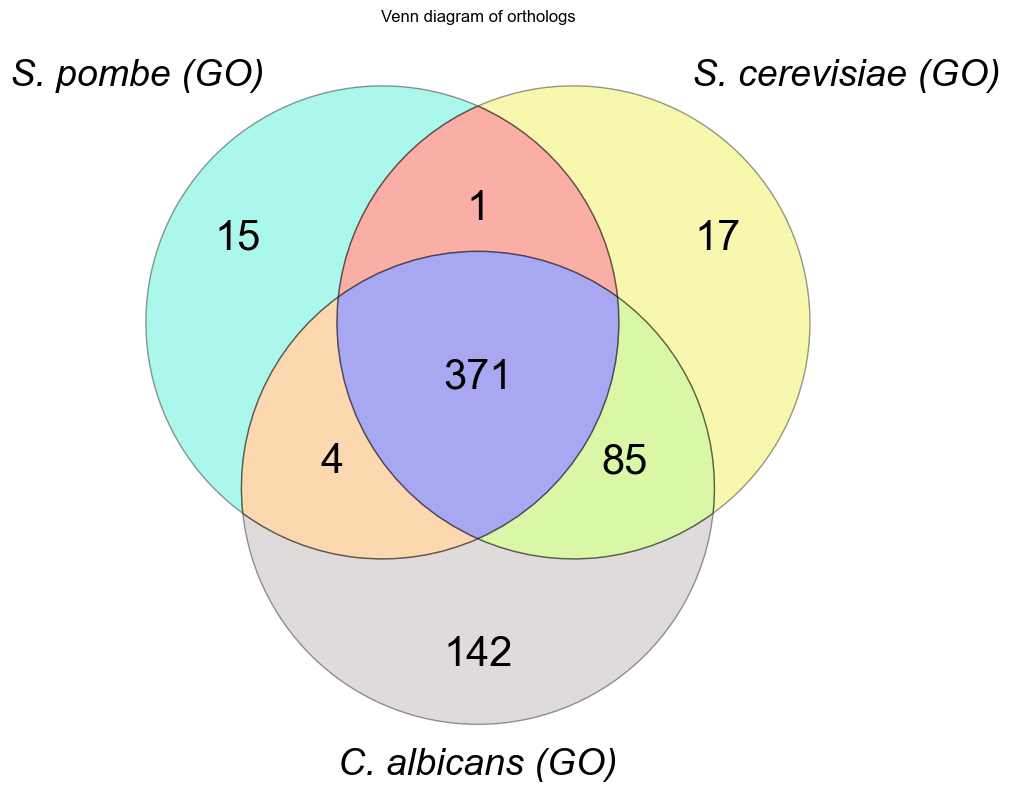

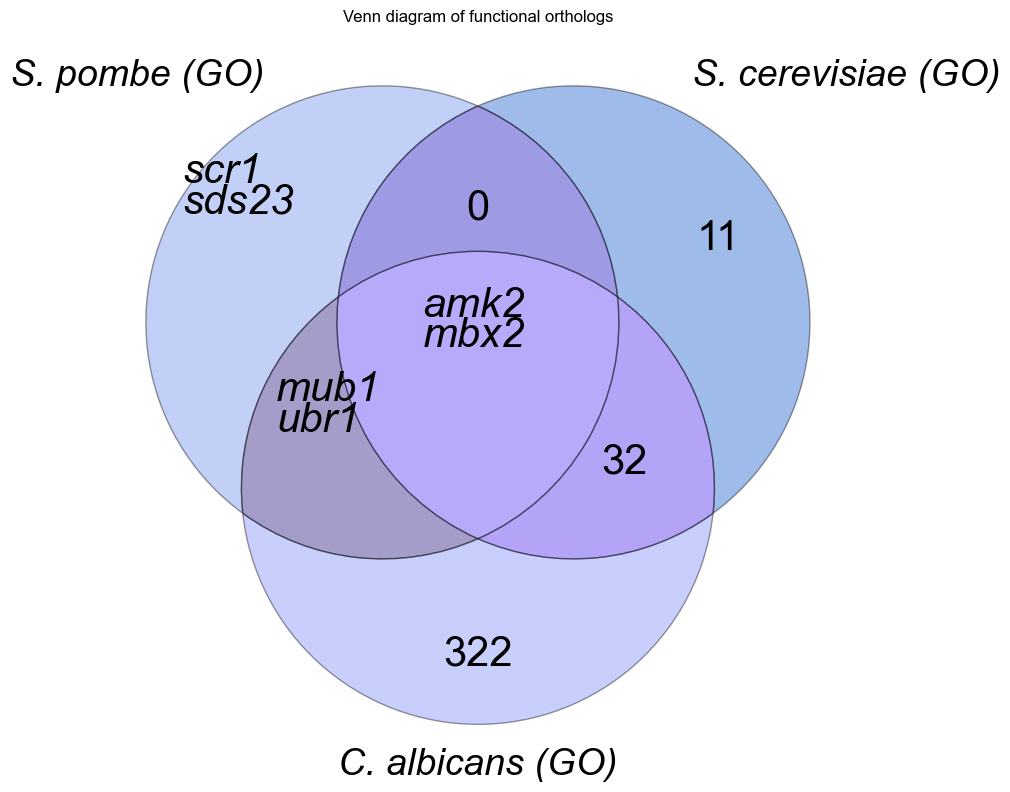

In [111]:
#final ortho
print("Make database")
database = make_dbase(albicans_genes, cerevisiae_genes, pombe_genes)
print("Single entry database")
sedb = single_entry_dbase(database)
print("Add ortholog groups")
ortho = add_ortholog_grps(sedb)
print("Ortho to venn")
final_ortho = ortho_to_venn(ortho)
print("Functional ortho")
final_ortho.to_csv("final_orthology_database.csv_new")
final_func_ortho_,venn_dic = functional_ortho(final_ortho,albicans_genes, cerevisiae_genes, pombe_genes)

plt.savefig(root + "Figures/All figures/Venn_ortholog_new.svg", format="svg", dpi=400, bbox_inches='tight')
plt.savefig(root + "Figures/All figures/Venn_ortholog_new.png", format="png", dpi=400, bbox_inches='tight')

print("Show overlap")
overlap = show_overlap(final_func_ortho_, venn_dic, pombe_genes,cats=[7,6,5,4,3,2,1])
#export overlap where functional orthopattern is 7
overlap_=overlap[overlap["functional_orthopattern orthopattern"] == 7]
overlap_.to_csv(root + "Bence folder/Orthologs/overlap_go_new.csv")
#annotated overlap
overlap_

plt.savefig(root + "Figures/All figures/Venn_functional_ortholog_new.svg", format="svg", dpi=400, bbox_inches='tight')
plt.savefig(root + "Figures/All figures/Venn_functional_ortholog_new.png", format="png", dpi=400, bbox_inches='tight')


In [112]:
import numpy as np
import pandas as pd

# Assuming final_ortho['pombe_name(s)'] contains the original data
# Example of extracting and flattening
pombe_genes_export = final_ortho["pombe_name(s)"].values

# Flatten the list (ignoring NaNs and any lists within)
pombe_genes_export_flat = np.concatenate([x for x in pombe_genes_export if isinstance(x, list)])

# Remove NaN entries (we can use pandas to easily filter NaNs)
pombe_genes_export_flat = [gene for gene in pombe_genes_export_flat if pd.notna(gene)]

# Convert to DataFrame for easier export
pombe_genes_export_flat = pd.DataFrame(pombe_genes_export_flat, columns=["pombe_gene"])

# Save to CSV
pombe_genes_export_flat.to_csv("pombe_genes_export_new.csv", index=False)

print("Exported clean data to 'pombe_genes.csv'")


Exported clean data to 'pombe_genes.csv'


In [113]:
pombe_genes_export_flat

,pombe_gene
0,SPAC31G5.09c
1,SPBC428.06c
2,SPBC409.21
3,SPAC2F7.08c
4,SPAC694.03
...,...
473,SPBC646.13
474,SPBC947.04
475,SPBPJ4664.02
476,SPCC1223.13


In [114]:
#similarly add annotations to final_func_ortho
def annotated_overlap(ffo):
    ffo["gene common name"] = np.nan
    ffo["pombe_function"] = np.nan
    for index, row in ffo.iterrows():
        if str(row["pombe_name(s)"][0]) != "nan":
            
            for gene in row["pombe_name(s)"]:
                if gene in map[0].values:
                    
                    ffo["gene common name"][index] = map[2][map[0] == gene].values
                    ffo["pombe_function"][index] = map[4][map[0] == gene].values
    return ffo
final_func_ortho = annotated_overlap(final_func_ortho_)

In [115]:
#create pombe_func_ortho, which is a subset of final_func_ortho, where pombe_name(s) is not a list with nan
#and functional orthopattern is not 4
for i in range(0,len(final_func_ortho)):
    if str(final_func_ortho["pombe_name(s)"][i][0]) == "nan":

        final_func_ortho.drop(i, inplace=True)

#reset index
final_func_ortho.reset_index(drop=True, inplace=True)
for i in range(0,len(final_func_ortho)):
    if final_func_ortho["functional_orthopattern orthopattern"][i] == 4:
        final_func_ortho.drop(i, inplace=True)
    
final_func_ortho.head(50)

,albicans_name(s),cerevisiae_name(s),pombe_name(s),albicans,cerevisiae,pombe,orthopattern,functional_orthopattern orthopattern,gene common name,pombe_function
0,[C4_06480C_A],"[YBL016W, YGR040W]",[SPAC31G5.09c],1.0,1.0,0.0,7,6,spk1,MAP kinase Spk1
1,[C4_01780C_A],[YBR095C],[SPBC428.06c],1.0,1.0,0.0,7,6,rxt2,histone deacetylase complex subunit Rxt2
2,[C4_04440W_A],[YBR171W],[SPBC409.21],1.0,1.0,0.0,7,6,sec66,ER protein translocation subcomplex subunit Sec66
3,[C3_04290C_A],[YBR289W],[SPAC2F7.08c],1.0,1.0,0.0,7,6,snf5,SWI/SNF complex subunit Snf5
4,[C1_13270W_A],[YCL047C],[SPAC694.03],1.0,1.0,0.0,7,6,nan,nicotinamide-nucleotide adenylyltransferase
5,[CR_02400W_A],[YDL024C],"[SPBC21H7.03c, SPBC428.03c, SPBP4G3.02]",0.0,1.0,0.0,7,2,pho1,extracellular acid phosphatase Pho1
6,[C5_01250W_A],[YDL035C],[SPCC1753.02c],1.0,1.0,0.0,7,6,git3,G-protein coupled receptor Git3
7,[CR_03900W_A],[YDL159W],[SPAC1D4.13],0.0,1.0,0.0,7,2,byr1,MAP kinase kinase Byr1
8,[C1_07070C_A],[YDL160C],[SPBC776.09],0.0,1.0,0.0,7,2,ste13,ATP-dependent RNA helicase Ste13/Dhh1
9,[CR_08070W_A],[YDL230W],[SPAC11E3.09],0.0,1.0,0.0,7,2,pyp3,protein tyrosine phosphatase Pyp3


# Repeat analysis with Phenotype ontologies added

In [13]:
#Load in files
pombe_po = pd.read_csv(root + "external data/Orthologs data/pombe_PO.phaf.gz", sep="\t")
#keep row Gene systematic ID and FYPO ID
pombe_po = pombe_po[["Gene systematic ID", "FYPO ID"]]
#rename columns
pombe_po.columns = ["gene","PO_ID"]

fypo_dict = {
    "FYPO:0000240":"abnormal filament morphology",
    "FYPO:0000010":"abolished cell-substrate adhesion",
    "FYPO:0000552":"decreased pseudohyphal growth",
    "FYPO:0000551":"pseudohyphal growth abolished",
    "FYPO:0001872":"abnormal cell adhesion",
    "FYPO:0000550":"abnormal pseudohyphal growth",
    "FYPO:0001203":"coflocculating cells",
    "FYPO:0004153":"increased flocculation in stationary phase",
    "FYPO:0003335":"increased galactose-specific flocculation",
    "FYPO:0000155":"increased flocculation"}
keys = list(fypo_dict.keys())
pombe_po= pombe_po[pombe_po["PO_ID"].isin(keys)]["gene"]
#drop dup
pombe_po = pombe_po.drop_duplicates()
pombe_po = pombe_po.reset_index(drop=True)


albicans_po = pd.read_csv(root + "external data/Orthologs data/cgd_PO.tab", sep="\t")
#show albicans_po rows where column 10 has values which contain "pseudohyphal" or "invasive growth" or "floccilation" or "hyphal growth" or "biofilm"
subset = albicans_po[albicans_po["auxotrophy"].str.contains("pseudohyphal|invasive growth|flocculation|hyphal growth|biofilm", na=False)]
#remove ones where it contains :normal
subset = subset[~subset["auxotrophy"].str.contains(" normal", na=False)]

#keep column 3
subset = subset["ARG100"]
#rename column
subset.columns = ["gene"]
#remove duplicates
subset = subset.drop_duplicates()
#reset index
subset = subset.reset_index(drop=True)
albicans_genes_po = subset.copy()


cerevisiae_po = pd.read_csv(root + "external data/Orthologs data/sgd_PO.tab", 
                            sep="\t", 
                            header=None, 
                            on_bad_lines="skip", 
                            engine="python")

subset = cerevisiae_po[cerevisiae_po[9].str.contains("pseudohyphal|invasive growth|flocculation|hyphal growth|biofilm", na=False)]
subset = subset[~subset[9].str.contains(" normal", na=False)]
subset_df = subset.copy()
subset = subset[0]
subset.columns = ["gene"]
subset = subset.drop_duplicates()
subset = subset.reset_index(drop=True)
cerevisiae_genes_po = subset.copy()


#append albicans_genes_po, cerevisiae_genes_po, pombe_po to albicans_genes, cerevisiae_genes, pombe_genes
albicans_genes_go_po = np.append(albicans_genes, albicans_genes_po.values)
cerevisiae_genes_go_po = np.append(cerevisiae_genes, cerevisiae_genes_po.values)
pombe_genes_go_po = np.append(pombe_genes, pombe_po.values)
#remove duplicates
albicans_genes_go_po = np.unique(albicans_genes_go_po)
cerevisiae_genes_go_po = np.unique(cerevisiae_genes_go_po)
pombe_genes_go_po = np.unique(pombe_genes_go_po)

In [14]:
len(cerevisiae_genes_go_po)

1400

In [15]:
len(albicans_genes_go_po)

1103

In [16]:
len(pombe_genes_go_po)

77

In [120]:
fypo_dict_to_csv = pd.DataFrame.from_dict(fypo_dict, orient="index")
fypo_dict_to_csv.to_csv(root + "external data/Orthologs data/fypo_new.csv")

done
orthopattern
7    1301
3     291
2     251
6     228
4      52
1      25
5      10
Name: count, dtype: int64
albicans_name(s)      [C3_04290C_A]
cerevisiae_name(s)        [YBR289W]
pombe_name(s)         [SPAC2F7.08c]
albicans                        1.0
cerevisiae                      1.0
pombe                           1.0
orthopattern                      7
Name: 71, dtype: object
albicans_name(s)                    [C1_00060W_A]
cerevisiae_name(s)                      [YCR084C]
pombe_name(s)         [SPAC18B11.10, SPAC630.14c]
albicans                                      1.0
cerevisiae                                    1.0
pombe                                         1.0
orthopattern                                    7
Name: 92, dtype: object
albicans_name(s)       [C5_01250W_A]
cerevisiae_name(s)         [YDL035C]
pombe_name(s)         [SPCC1753.02c]
albicans                         1.0
cerevisiae                       1.0
pombe                            1.0
orthopattern  

,albicans_name(s),cerevisiae_name(s),pombe_name(s),albicans,cerevisiae,pombe,orthopattern,functional_orthopattern orthopattern,gene common name,pombe_function
0,[C3_04290C_A],[YBR289W],[SPAC2F7.08c],1.0,1.0,1.0,7.0,7.0,snf5,SWI/SNF complex subunit Snf5
1,[C1_00060W_A],[YCR084C],"[SPAC18B11.10, SPAC630.14c]",1.0,1.0,1.0,7.0,7.0,tup12,transcriptional corepressor Tup12
2,[C5_01250W_A],[YDL035C],[SPCC1753.02c],1.0,1.0,1.0,7.0,7.0,git3,G-protein coupled receptor Git3
3,[C2_08730W_A],[YDL233W],[SPBC30B4.03c],1.0,1.0,1.0,7.0,7.0,ldb1,"LIM domain binding protein, transcription core..."
4,"[C4_02500C_A, C1_13880C_A]","[YDR216W, YML081W]",[SPAC6F12.02],1.0,1.0,1.0,7.0,7.0,rst2,DNA-binding transcription factor Rst2
5,[C2_01470W_A],[YDR443C],[SPAC589.02c],1.0,1.0,1.0,7.0,7.0,med13,mediator complex subunit Med13
6,[C3_02240C_A],[YER020W],[SPAC23H3.13c],1.0,1.0,1.0,7.0,7.0,gpa2,heterotrimeric G protein alpha-2 subunit Gpa2
7,[C2_09230C_A],"[YER027C, YGL208W]",[SPCC1919.03c],1.0,1.0,1.0,7.0,7.0,amk2,serine/threonine protein kinase AMPK (beta) re...
8,[C5_02940C_A],"[YER028C, YGL035C, YGL209W]","[SPBC1D7.02c, SPBP4H10.09]",1.0,1.0,1.0,7.0,7.0,scr1,DNA-binding transcription repressor Scr1
9,[C6_04350C_A],[YER109C],"[SPBC1289.10c, SPCC1494.10]",1.0,1.0,1.0,7.0,7.0,adn3,DNA-binding transcription factor Adn3


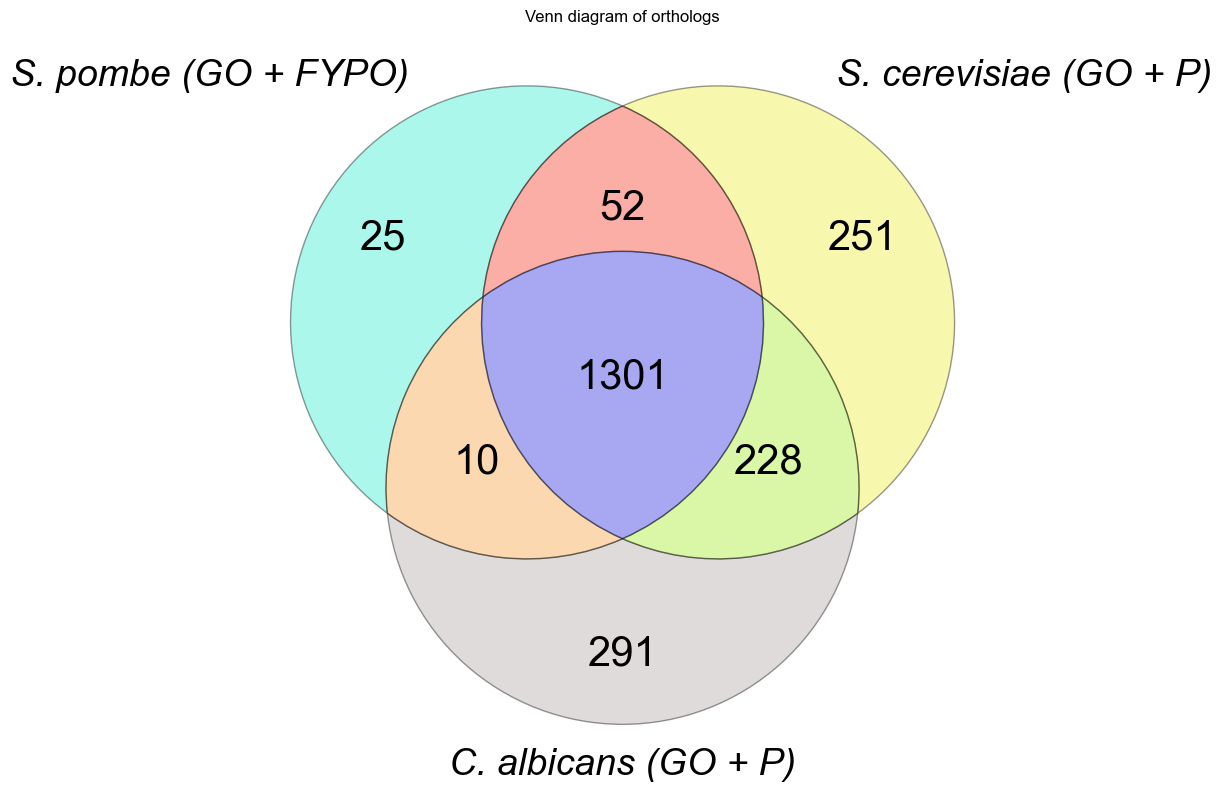

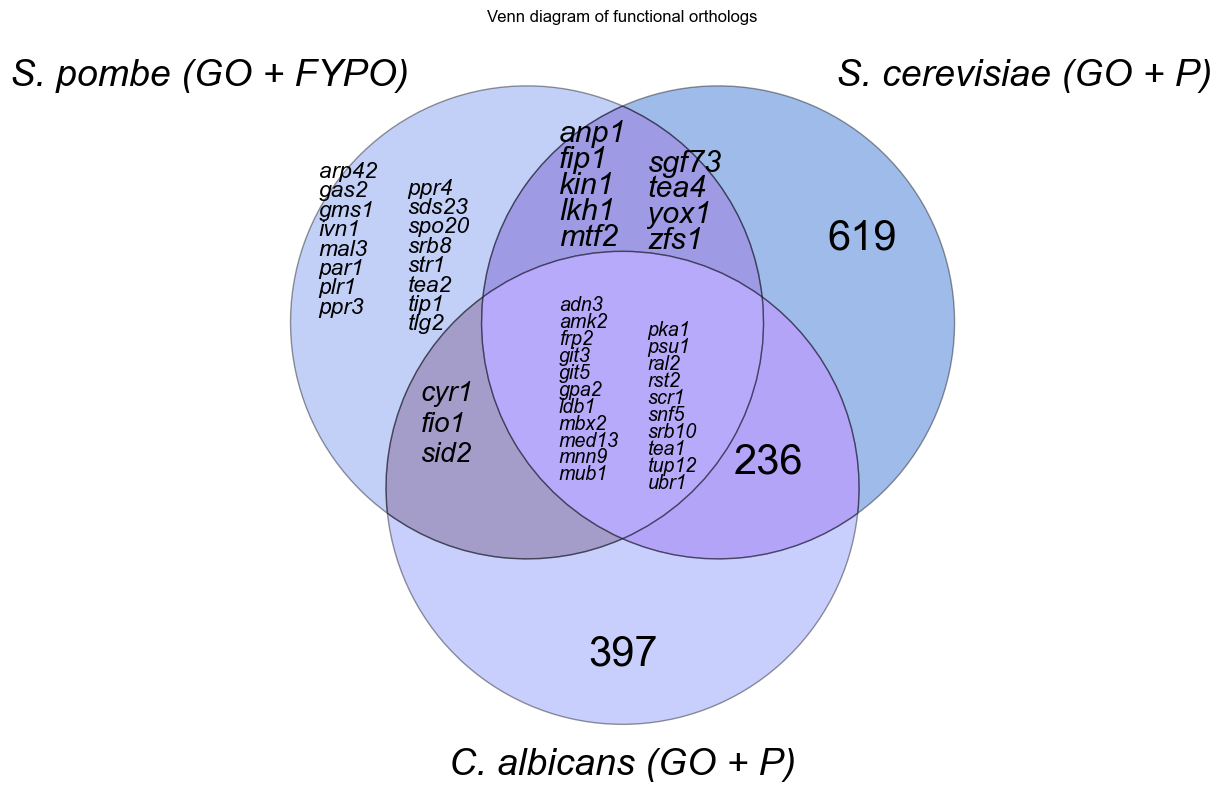

In [122]:
#final ortho
database = make_dbase(albicans_genes_go_po, cerevisiae_genes_go_po, pombe_genes_go_po)
sedb = single_entry_dbase(database)
ortho = add_ortholog_grps(sedb)
print("done")
final_ortho = ortho_to_venn(ortho, labels=['S. pombe (GO + FYPO)', 'S. cerevisiae (GO + P)', 'C. albicans (GO + P)'])


final_ortho.to_csv("final_orthology_database_new.csv")

#remove duplicate gene common name
final_func_ortho_,venn_dic = functional_ortho(final_ortho,albicans_genes_go_po, cerevisiae_genes_go_po, pombe_genes_go_po)

plt.savefig(root + "Figures/All figures/Venn_ortholog_phenotypes_new.svg", format="svg", dpi=400, bbox_inches='tight')
plt.savefig(root + "Figures/All figures/Venn_ortholog_phenotypes_new.png", format="png", dpi=400, bbox_inches='tight')

overlap = show_overlap(final_func_ortho_, venn_dic, pombe_genes_go_po, cats=[7,6,5,4,3,2,1],labels=['S. pombe (GO + FYPO)', 'S. cerevisiae (GO + P)', 'C. albicans (GO + P)'])
                       #export overlap where functional orthopattern is 7
overlap_=overlap[overlap["functional_orthopattern orthopattern"] == 7]
overlap_.to_csv(root + "Bence folder/Orthologs/overlap_po_go_new.csv")

plt.savefig(root + "Figures/All figures/Venn_func_ortholog_phenotypes_new.svg", format="svg", dpi=400, bbox_inches='tight')
plt.savefig(root + "Figures/All figures/Venn_func_ortholog_phenotypes_new.png", format="png", dpi=400, bbox_inches='tight')

#annotated overlap
overlap_


In [123]:
# Number of annotated and genetically conserved orthogroups in pombe
final_func_ortho_[final_func_ortho_["pombe"] == 1].shape

(49, 8)

In [124]:
# Number of annotated and genetically conserved orthogroups in cerevisiae
final_func_ortho_[final_func_ortho_["cerevisiae"] == 1].shape

(885, 8)

In [125]:
# Number of annotated and genetically conserved orthogroups in albicans
final_func_ortho_[final_func_ortho_["albicans"] == 1].shape

(657, 8)

In [126]:
# Number of annotated and genetically conserved orthogroups in pombe
final_func_ortho_[final_func_ortho_["pombe"] == 1].shape

(49, 8)

In [32]:
# Number of annotated and genetically conserved orthogroups in cerevisiae
final_func_ortho_[final_func_ortho_["cerevisiae"] == 1].shape

(885, 8)

In [33]:
# Number of annotated and genetically conserved orthogroups in albicans
final_func_ortho_[final_func_ortho_["albicans"] == 1].shape


(657, 8)

In [34]:
#total  number of annotated orthogroups in pombe
len(pombe_genes_go_po)

77

In [35]:
#total  number of annotated orthogroups in cerevisiae
len(cerevisiae_genes_go_po)

1400

In [36]:
#total  number of annotated orthogroups in albicans
len(albicans_genes_go_po)

1103

# Check conservation of cell surface adhesion proteins

In [127]:

#Yes these are indeed the flocculins

albicans_floc_dict = {"C6_03700W_A":"ALS1",
                        "C6_04380W_A":"ALS2",
                        "CR_07070C_A":"ALS3",
                        "C6_04130C_A":"ALS4",
                        "C6_03690W_A":"ALS5",
                        "C3_06190C_A":"ALS6",
                        "C3_06320W_A":"ALS7",
                        "C6_03710W_A":"ALS9"}

cerevisiae_floc_dict = {"YAR050W":"FLO1",
                        "YHR211W":"FLO5",
                        "YAL063C":"FLO9",
                        "YKR102W":"FLO10",
                        "YIR019C":"FLO11"}


pombe_floc_dict = {"SPAC186.01":"pfl9",
                   "SPAC1F8.06":"pfl8",
                   "SPBC359.04c":"pfl7",
                   "SPAC977.07c":"pfl6",
                   "SPBC1289.15":"pfl5",
                   "SPCC188.09c":"pfl4",
                   "SPBC947.04":"pfl3",
                   "SPAP11E10.02c":"mam3",
                   "SPAPB15E9.01c":"pfl2",
                   "SPAPB2C8.01":"SPAPB2C8.01",
                   "SPBC1348.08c":"SPBC1348.08c",
                   "SPBC21D10.06c":"map4",
                   "SPBPJ4664.02":"SPBPJ4664.02",
                   "SPCC1742.01":"gsf2"}



                   

                   


                   
                   
                   

          


In [133]:
final_ortho

,albicans_name(s),cerevisiae_name(s),pombe_name(s),albicans,cerevisiae,pombe,orthopattern
0,[C4_04510W_A],[YAL001C],[SPBC336.07],1,1,1,7
1,[C4_04480C_A],[YAL003W],[SPCC1450.04],1,1,1,7
2,NaN,[YAL004W],NaN,0,1,0,2
3,[C2_04800C_A],[YAL010C],[SPAC17H9.17c],1,1,1,7
4,[CR_08340W_A],[YAL012W],NaN,1,1,0,6
...,...,...,...,...,...,...,...
2153,[C2_07760W_A],[YPL264C],[SPCC1795.03],1,1,1,7
2154,[C2_06420C_A],[YOR014W],[SPCC188.02],1,1,1,7
2155,NaN,NaN,[SPCC188.09c],0,0,1,1
2156,NaN,NaN,[SPCC736.08],0,0,1,1


In [128]:
# Fix for the cerevisiae flocculins filtering
mask = final_ortho["cerevisiae_name(s)"].apply(
    lambda x: isinstance(x, (list, tuple)) and any(item in cerevisiae_floc_dict.keys() for item in x)
)
final_ortho[mask]


,albicans_name(s),cerevisiae_name(s),pombe_name(s),albicans,cerevisiae,pombe,orthopattern
13,NaN,[YAL063C],NaN,0,1,0,2
18,[C6_03710W_A],[YAR050W],NaN,1,1,0,6
609,NaN,[YHR211W],NaN,0,1,0,2
661,NaN,[YIR019C],NaN,0,1,0,2
803,NaN,[YKR102W],NaN,0,1,0,2


In [135]:
# Fix for the cerevisiae flocculins filtering
mask = final_ortho["albicans_name(s)"].apply(
    lambda x: isinstance(x, (list, tuple)) and any(item in albicans_floc_dict.keys() for item in x)
)
final_ortho[mask]


,albicans_name(s),cerevisiae_name(s),pombe_name(s),albicans,cerevisiae,pombe,orthopattern
18,[C6_03710W_A],[YAR050W],NaN,1,1,0,6
1731,[C3_06190C_A],NaN,NaN,1,0,0,3
1733,[C3_06320W_A],NaN,NaN,1,0,0,3
1976,[C6_03690W_A],NaN,NaN,1,0,0,3
1977,[C6_03700W_A],NaN,NaN,1,0,0,3
1981,[C6_04130C_A],NaN,NaN,1,0,0,3
1984,[C6_04380W_A],NaN,NaN,1,0,0,3
2084,[CR_07070C_A],NaN,NaN,1,0,0,3


In [136]:
# Fix for the cerevisiae flocculins filtering
mask = final_ortho["pombe_name(s)"].apply(
    lambda x: isinstance(x, (list, tuple)) and any(item in pombe_floc_dict.keys() for item in x)
)
final_ortho[mask]


,albicans_name(s),cerevisiae_name(s),pombe_name(s),albicans,cerevisiae,pombe,orthopattern
2116,NaN,NaN,[SPAC186.01],0,0,1,1
2119,NaN,NaN,[SPAC1F8.06],0,0,1,1
2127,NaN,NaN,[SPAC977.07c],0,0,1,1
2129,NaN,NaN,[SPAP11E10.02c],0,0,1,1
2130,NaN,NaN,[SPAPB15E9.01c],0,0,1,1
2132,NaN,NaN,[SPAPB2C8.01],0,0,1,1
2135,NaN,NaN,[SPBC1289.15],0,0,1,1
2136,NaN,NaN,[SPBC1348.08c],0,0,1,1
2141,NaN,NaN,[SPBC21D10.06c],0,0,1,1
2144,NaN,NaN,[SPBC359.04c],0,0,1,1


# Checking for orthologs in the deletion library hits

In [41]:
#load in deletion hits
screen = pd.read_csv(root + 'Bence folder/Bioneer screen/adhesion_ratio.csv', sep=',')
deletion_hits = screen["systematic_name"].values

In [87]:
final_func_ortho

,albicans_name(s),cerevisiae_name(s),pombe_name(s),albicans,cerevisiae,pombe,orthopattern,functional_orthopattern orthopattern,gene common name,pombe_function
0,[C4_06480C_A],"[YBL016W, YGR040W]",[SPAC31G5.09c],1.0,1.0,0.0,7,6,spk1,MAP kinase Spk1
1,[C4_01780C_A],[YBR095C],[SPBC428.06c],1.0,1.0,0.0,7,6,rxt2,histone deacetylase complex subunit Rxt2
2,[C4_04440W_A],[YBR171W],[SPBC409.21],1.0,1.0,0.0,7,6,sec66,ER protein translocation subcomplex subunit Sec66
3,[C3_04290C_A],[YBR289W],[SPAC2F7.08c],1.0,1.0,0.0,7,6,snf5,SWI/SNF complex subunit Snf5
4,[C1_13270W_A],[YCL047C],[SPAC694.03],1.0,1.0,0.0,7,6,nan,nicotinamide-nucleotide adenylyltransferase
...,...,...,...,...,...,...,...,...,...,...
366,[C7_03870W_A],[YGL058W],[SPAC18B11.07c],1.0,0.0,0.0,7,3,rhp6,histone H2B-K119 ubiquitin ligase complex (HUL...
367,[C7_03940C_A],"[YDL155W, YLR210W]","[SPBC16E9.17c, SPCC4E9.02]",1.0,0.0,0.0,7,3,cig1,G1/S-specific B-type cyclin Cig1
368,[C7_04300W_A],[YGR116W],[SPAC1F7.01c],1.0,0.0,0.0,7,3,spt6,histone H3-H4 chaperone Spt6
369,[C5_02940C_A],"[YER028C, YGL035C, YGL209W]",[SPBC1D7.02c],0.0,0.0,1.0,7,1,scr1,DNA-binding transcription repressor Scr1


done
orthopattern
7    1298
3     291
2     251
6     228
4      52
5      10
1       7
Name: count, dtype: int64
albicans_name(s)      [C1_01790W_A, C3_04110C_A]
cerevisiae_name(s)            [YDL056W, YER111C]
pombe_name(s)         [SPAC22F3.09c, SPBC725.16]
albicans                                     1.0
cerevisiae                                   1.0
pombe                                        1.0
orthopattern                                   7
Name: 102, dtype: object
albicans_name(s)           [C3_00670C_A]
cerevisiae_name(s)    [YNL068C, YIL131C]
pombe_name(s)             [SPBC16G5.15c]
albicans                             1.0
cerevisiae                           1.0
pombe                                1.0
orthopattern                           7
Name: 675, dtype: object
0       2
1       2
2       2
3       2
4       2
       ..
1293    1
1294    1
1295    1
1296    1
1297    1
Name: functional_orthopattern orthopattern, Length: 1298, dtype: int64


,albicans_name(s),cerevisiae_name(s),pombe_name(s),albicans,cerevisiae,pombe,orthopattern,functional_orthopattern orthopattern,gene common name,pombe_function
0,"[C1_01790W_A, C3_04110C_A]","[YDL056W, YER111C]","[SPAC22F3.09c, SPBC725.16]",1.0,1.0,1.0,7.0,7.0,res1,MBF transcription factor complex subunit Res1
1,[C3_00670C_A],"[YNL068C, YIL131C]",[SPBC16G5.15c],1.0,1.0,1.0,7.0,7.0,fkh2,DNA-binding forkhead transcription factor Fkh2


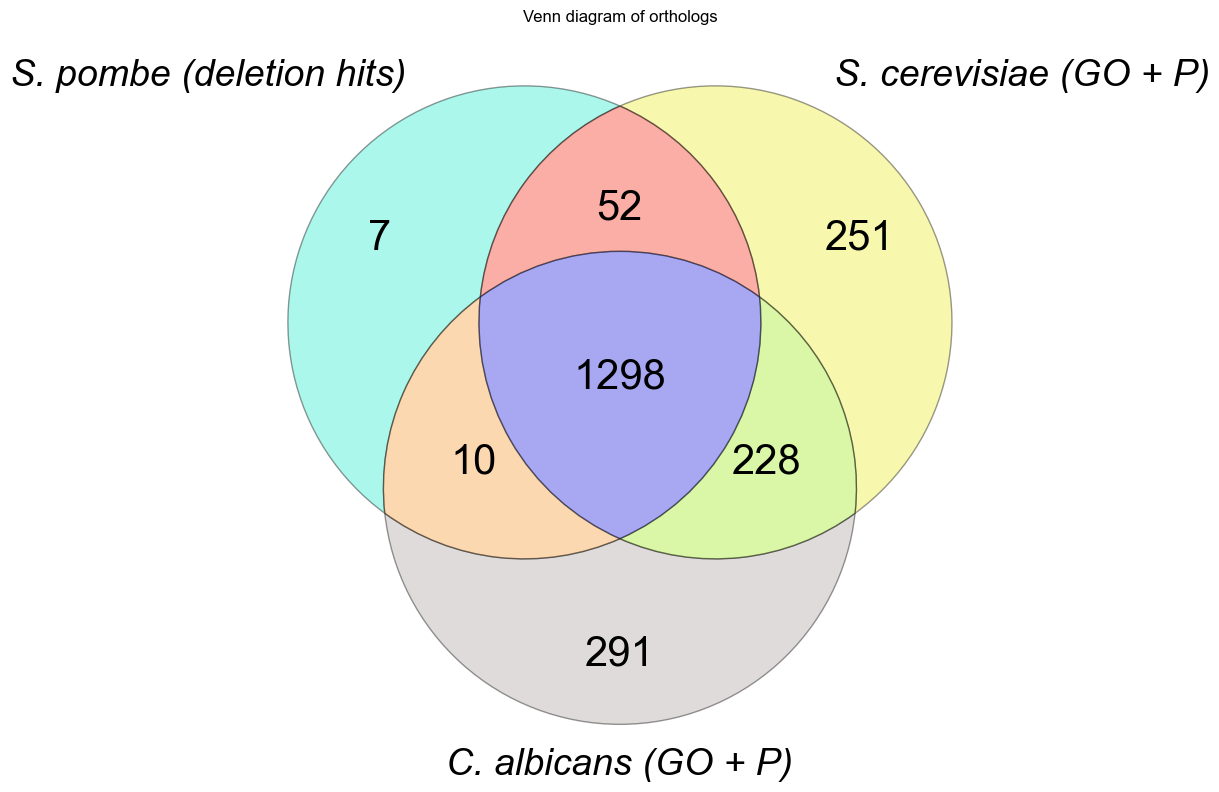

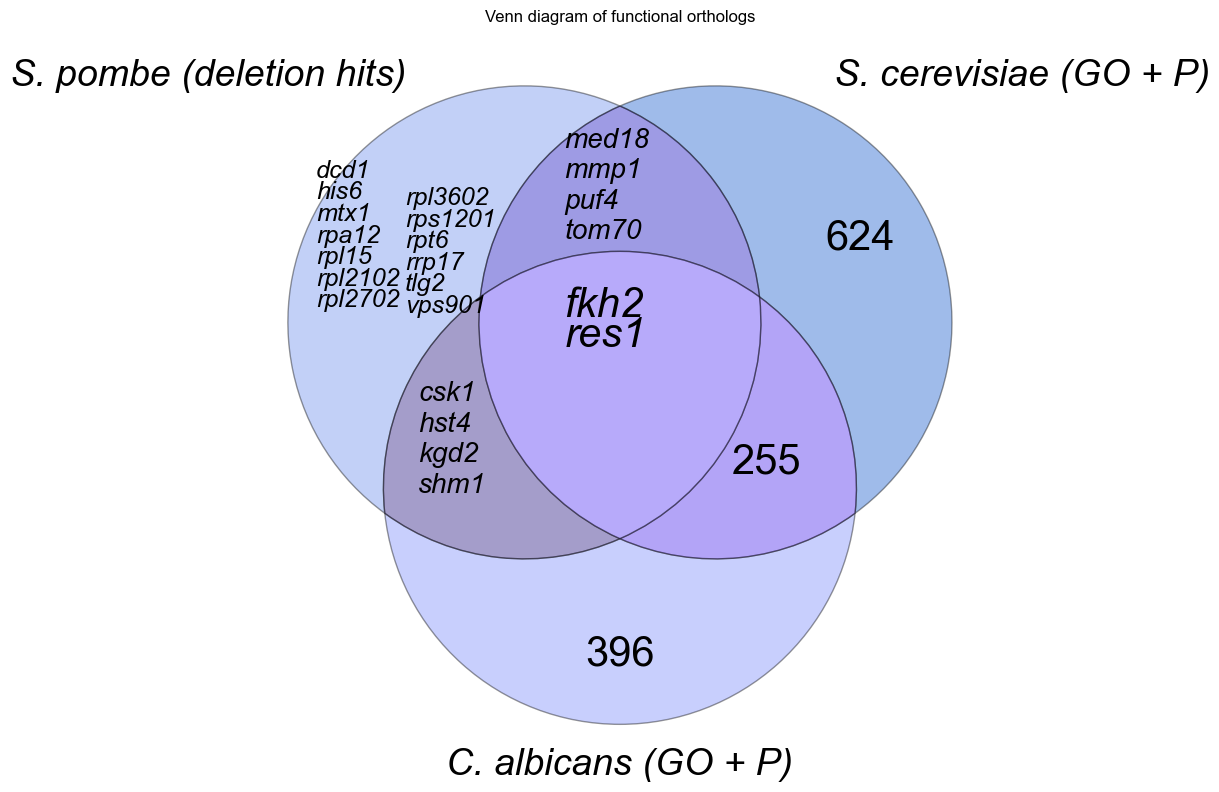

In [42]:
database = make_dbase(albicans_genes_go_po, cerevisiae_genes_go_po, deletion_hits)
sedb = single_entry_dbase(database)
ortho = add_ortholog_grps(sedb)
print("done")
final_ortho = ortho_to_venn(ortho, labels=['S. pombe (deletion hits)', 'S. cerevisiae (GO + P)', 'C. albicans (GO + P)'])


#remove duplicate gene common name
final_func_ortho_,venn_dic = functional_ortho(final_ortho,albicans_genes_go_po, cerevisiae_genes_go_po, deletion_hits)

plt.savefig(root + "Figures/All figures/Venn_ortholog_screen_new.svg", format="svg", dpi=400, bbox_inches='tight')
plt.savefig(root + "Figures/All figures/Venn_ortholog_screen_new.png", format="png", dpi=400, bbox_inches='tight')

overlap = show_overlap(final_func_ortho_, venn_dic, cats=[7,6,5,4,3,2,1],labels=['S. pombe (deletion hits)', 'S. cerevisiae (GO + P)', 'C. albicans (GO + P)'])
                       #export overlap where functional orthopattern is 7

plt.savefig(root + "Figures/All figures/Venn_func_ortholog_screen_new.svg", format="svg", dpi=400, bbox_inches='tight')
plt.savefig(root + "Figures/All figures/Venn_func_ortholog_screen_new.png", format="png", dpi=400, bbox_inches='tight')


overlap_=overlap[overlap["functional_orthopattern orthopattern"] == 7]
overlap_.to_csv(root + "Bence folder/Orthologs/overlap_po_go_new.csv")
#annotated overlap
overlap_

In [82]:
overlap_

,albicans_name(s),cerevisiae_name(s),pombe_name(s),albicans,cerevisiae,pombe,orthopattern,functional_orthopattern orthopattern,gene common name,pombe_function
0,"[C1_01790W_A, C3_04110C_A]","[YDL056W, YER111C]","[SPAC22F3.09c, SPBC725.16]",1.0,1.0,1.0,7.0,7.0,res1,MBF transcription factor complex subunit Res1
1,[C3_00670C_A],"[YNL068C, YIL131C]",[SPBC16G5.15c],1.0,1.0,1.0,7.0,7.0,fkh2,DNA-binding forkhead transcription factor Fkh2


In [43]:
#final_ortho orthopattern 1
final_ortho[final_ortho["orthopattern"] == 1]

,albicans_name(s),cerevisiae_name(s),pombe_name(s),albicans,cerevisiae,pombe,orthopattern
2124,NaN,NaN,[SPCC1259.14c],0,0,1,1
2125,NaN,NaN,[SPNCRNA.1234],0,0,1,1
2126,NaN,NaN,[SPCC895.05],0,0,1,1
2129,NaN,NaN,[SPNCRNA.900],0,0,1,1
2132,NaN,NaN,[SPAC607.02c],0,0,1,1
2133,NaN,NaN,[SPNCRNA.781],0,0,1,1
2135,NaN,NaN,[SPBC354.05c],0,0,1,1


In [44]:
#Show ones unique to S pombe	
overlap[overlap["functional_orthopattern orthopattern"] == 1]

,albicans_name(s),cerevisiae_name(s),pombe_name(s),albicans,cerevisiae,pombe,orthopattern,functional_orthopattern orthopattern,gene common name,pombe_function
1285,[CR_04100C_A],"[YLR029C, YMR121C]",[SPCC576.11],0.0,0.0,1.0,7.0,1.0,rpl15,60S ribosomal protein L15
1286,[C2_07300C_A],[YJR063W],[SPCC1259.03],0.0,0.0,1.0,7.0,1.0,rpa12,DNA-directed RNA polymerase complex I TFIIS su...
1287,[C2_02210C_A],[YOL018C],[SPAC823.05c],0.0,0.0,1.0,7.0,1.0,tlg2,SNARE Tlg2
1288,[C1_14310W_A],[YHR144C],[SPBC2G2.13c],0.0,0.0,1.0,7.0,1.0,dcd1,deoxycytidylate deaminase
1289,[C2_03960W_A],"[YMR194W, YPL249C-A]",[SPBC405.07],0.0,0.0,1.0,7.0,1.0,rpl3602,60S ribosomal protein L36
1290,[C3_07150C_A],[YOR369C],[SPCC962.04],0.0,0.0,1.0,7.0,1.0,rps1201,40S ribosomal protein S12
1291,[C2_03810C_A],"[YBR191W, YPL079W]",[SPAC959.08],0.0,0.0,1.0,7.0,1.0,rpl2102,60S ribosomal protein L21
1292,[C4_05640C_A],[YIL020C],[SPAC3F10.09],0.0,0.0,1.0,7.0,1.0,his6,1-(5-phosphoribosyl)-5-[(5-phosphoribosylamino...
1293,[C1_12390C_A],"[YDR471W, YHR010W]",[SPCC74.05],0.0,0.0,1.0,7.0,1.0,rpl2702,60S ribosomal protein L27
1294,[C1_07950C_A],[YDR412W],[SPAC29A4.09],0.0,0.0,1.0,7.0,1.0,rrp17,rRNA exonuclease Rrp17


In [66]:
overlap

,albicans_name(s),cerevisiae_name(s),pombe_name(s),albicans,cerevisiae,pombe,orthopattern,functional_orthopattern orthopattern,gene common name,pombe_function
0,"[C1_01790W_A, C3_04110C_A]","[YDL056W, YER111C]","[SPAC22F3.09c, SPBC725.16]",1.0,1.0,1.0,7.0,7.0,res1,MBF transcription factor complex subunit Res1
1,[C3_00670C_A],"[YNL068C, YIL131C]",[SPBC16G5.15c],1.0,1.0,1.0,7.0,7.0,fkh2,DNA-binding forkhead transcription factor Fkh2
2,"[C4_01800W_A, C4_01840C_A]",[YAL049C],"[SPAC977.15, SPBC30D10.14]",1.0,1.0,0.0,7.0,6.0,nan,dienelactone hydrolase family
3,[C4_06480C_A],"[YBL016W, YGR040W]",[SPAC31G5.09c],1.0,1.0,0.0,7.0,6.0,spk1,MAP kinase Spk1
4,[C1_07490C_A],[YBL035C],[SPCC553.09c],1.0,1.0,0.0,7.0,6.0,spb70,DNA polymerase alpha B-subunit
...,...,...,...,...,...,...,...,...,...,...
1293,[C1_12390C_A],"[YDR471W, YHR010W]",[SPCC74.05],0.0,0.0,1.0,7.0,1.0,rpl2702,60S ribosomal protein L27
1294,[C1_07950C_A],[YDR412W],[SPAC29A4.09],0.0,0.0,1.0,7.0,1.0,rrp17,rRNA exonuclease Rrp17
1295,[C2_02160W_A],[YMR060C],[SPBC409.19c],0.0,0.0,1.0,7.0,1.0,mtx1,metaxin 1 (Sam37)
1296,[C6_02630C_A],[YML097C],[SPBC4F6.10],0.0,0.0,1.0,7.0,1.0,vps901,GEF Vps901


In [46]:
!pip install watermark

In [47]:
%load_ext watermark
%watermark


Last updated: 2025-03-10T16:23:20.430209+00:00

Python implementation: CPython
Python version       : 3.12.4
IPython version      : 8.25.0

Compiler    : Clang 14.0.6 
OS          : Darwin
Release     : 23.3.0
Machine     : arm64
Processor   : arm
CPU cores   : 10
Architecture: 64bit



In [48]:
%watermark --iversions



pandas         : 2.2.3
numpy          : 1.26.4
seaborn        : 0.13.2
matplotlib_venn: 1.1.2
matplotlib     : 3.10.1
scipy          : 1.12.0

